# Машинное обучение, ШАД
## Домашнее задание 2

**Правила:**

* **Дедлайн 7.10 15:00**. После дедлайна работы не принимаются.
* Выполненную работу нужно прикрепить в ЛМС
* Прислать нужно **ноутбук в формате `ipynb`** и **`zip`-архив** с `txt`-файлами вашего общения с ИИ (в любом формате), если оно использовалось для решения задания.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Для теоретических задач решение оформите в формате $\LaTeX$.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Использовании ИИ при решении задач**

* При решении задач можно использовать ИИ в качесте помощника, если в условии задачи не сказано иное, но только в технических фрагментах задач. Например, можно спрашивать "как работает такая-то функция" или "как на графике нарисовать такую-то фигуру". Нельзя решать с помощью ИИ содержательную часть задачи.
* При решении теоретических задач можно написать черновик формул и попросить ИИ оформить эти формулы в $\LaTeX$.
* Злоупотребление использованием ИИ приравнивается к списыванию и карается штрафом.
* Чат с ИИ необходимо прислать вместе с работой.
* <a href="https://thetahat.ru/courses/ai-rules">Больше примеров</a>, что можно, а что &mdash; нет.

**Баллы за задание**

Обязательная часть:

* Задача 1 &mdash; 80 баллов;
* Задача 2 &mdash; 30 баллов;
* Задача 3 &mdash; 30 баллов.

Вариативная часть:

* Задача 4 &mdash; 30 баллов;
* Задача 5 &mdash; 40 баллов.

Можно решать любые задачи вариативной части, но максимально за нее можно получить не более 70 баллов. Тем самым, за все задание максимум **210 баллов**.

----

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, StandardScaler
from sklearn.preprocessing import normalize # допиши необходимые импорты

sns.set(style="whitegrid", palette="Set2")

In [ ]:
a

In [7]:
a = np.array([1,2,3,1,2,1,1,1,3,2,2,1])
counts = np.bincount(a)
print(counts)
print(np.argmax(counts))

[0 6 4 2]
1


*Привет!*

*Перед тобой увлекательная домашка по линейной регрессии и градиентным методам оптимизации. Надеемся, что тебе она понравится, ты точно найдешь в ней что-то интересное. Конечно, просто не будет, но никто этого и не обещал. В условии оставлены некоторые скрытые подсказки, будет хорошо, если ты сначала постараешься подумать самостоятельно, а затем раскроешь содержимое подсказки. Если у тебя будут вопросы по условию, можешь обратиться с ними в чат. Только очень желательно не делиться в чате фрагментами решения.*

*Успехов в решении!*

---
### Задача 1.

*Для начала поупражняемся с простой линейной регрессией на реальных данных. Перед выполнением задачи ознакомтесь с ноутбуком по линейной регрессии с занятия.*

Недавно было лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов за текущий день.

---

Скачайте данные, загрузите файл `day.csv` с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [ ]:
data = pd.read_csv("./day.csv")[["season", "mnth", "holiday", "weekday",
                                 "workingday", "weathersit", "temp", "atemp",
                                 "hum", "windspeed", "cnt"]]

train, test = train_test_split(data, test_size=0.2, random_state=42)
train

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
682,4,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,4094
250,3,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,1842
336,4,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783,3614
260,3,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483,4274
543,3,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775,7335
...,...,...,...,...,...,...,...,...,...,...,...
71,1,3,0,0,0,1,0.384348,0.380091,0.527391,0.270604,2417
106,2,4,0,0,0,1,0.456667,0.445696,0.479583,0.303496,3744
270,4,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,3907
435,1,3,0,0,0,1,0.361739,0.359670,0.476957,0.222587,4911


#### 1. Визуальный анализ

*Помочь в выполнении может ноутбук по линейной регрессии с занятия 2 и ноутбук по EDA с занятия 1.*

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

<br/><details>
<summary> ➡️ Кликни для показа подсказки </summary>
Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?
</details>

In [ ]:
cat_features = ["weekday", "holiday", "workingday", "weathersit"]  # категориальные признаки
real_features = ["mnth", "atemp", "hum", "windspeed"]  # вещественные признаки
target_feature = "cnt"  # целевой признак

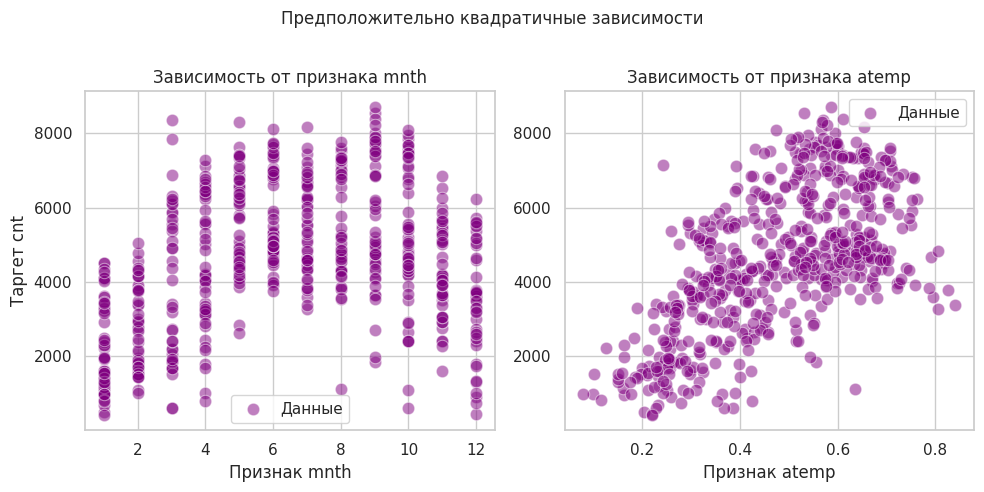

In [ ]:
fig_reat, axes_real = plt.subplots(1, 2, figsize=(2*5, 5))
axes_real = axes_real.flatten()

for i, ftr in enumerate(["mnth","atemp"]):
    ax = axes_real[i]
    sns.scatterplot(
        x=train[ftr].to_numpy().reshape(-1), y=train[target_feature].to_numpy().reshape(-1), label="Данные", ax = ax, alpha=0.5, s=80, color="purple" )
    ax.set_title(f"Зависимость от признака {ftr}")
    ax.set_xlabel(f"Признак {ftr}")
    ax.set_ylabel("Таргет cnt" if i == 0 else "")

fig_reat.suptitle("Предположительно квадратичные зависимости", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show();

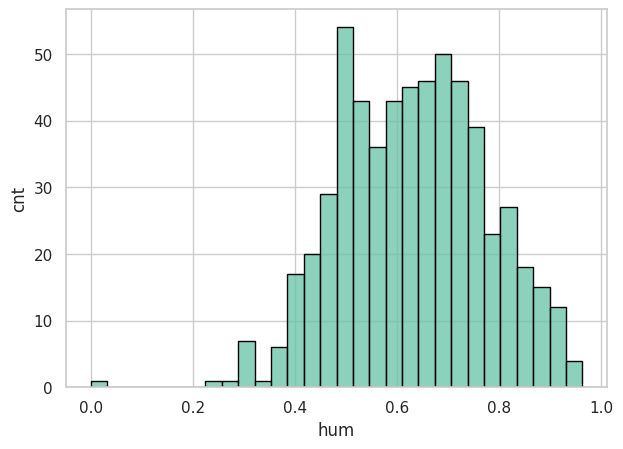

In [ ]:
sns.histplot(train["hum"], edgecolor="black", bins=30)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.ylabel("cnt")
plt.show()

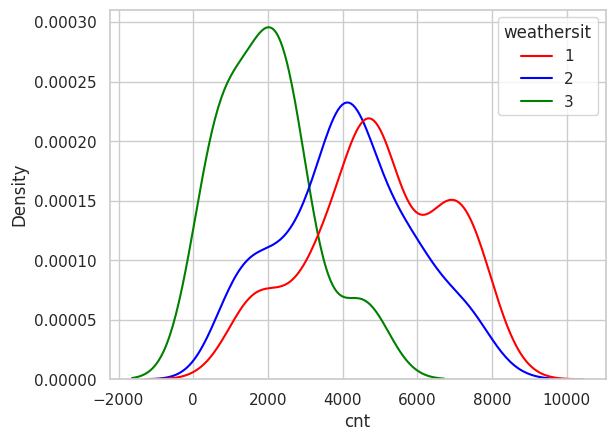

In [ ]:
kde = sns.kdeplot(train[["cnt", "weathersit"]], hue="weathersit", x = "cnt", palette=['red', 'blue', 'green'], common_norm=False)

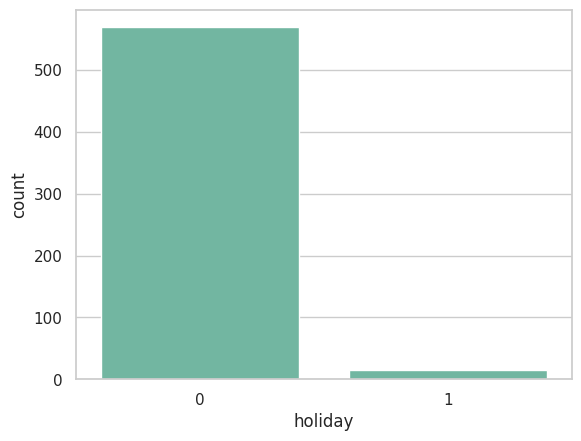

In [ ]:
sns.countplot(train, x='holiday')
plt.show()

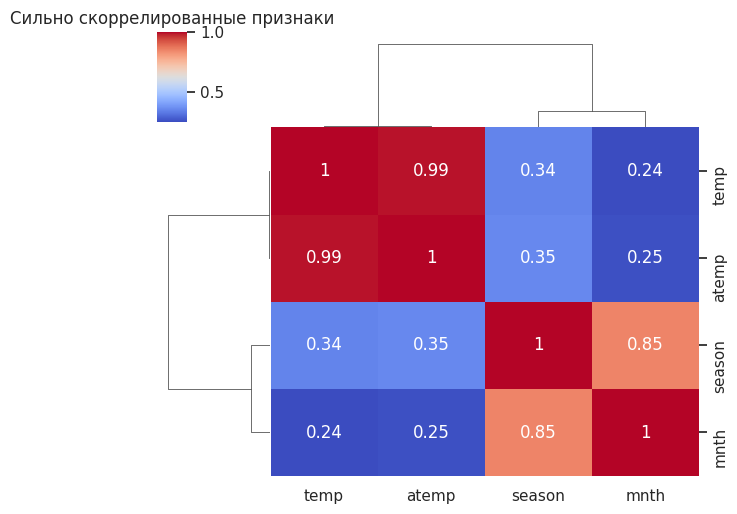

In [ ]:
sns.clustermap(train[['temp', 'atemp', 'season', 'mnth']].corr(numeric_only=True), cmap="coolwarm", annot=True, figsize=(6, 5))
plt.title("Сильно скоррелированные признаки")
plt.show()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2, \log x, I\{x > c\}$.
* <font color="red"><b>Не стоит сильно закапываться в анализ графиков и подбор функций.</b></font> Время у всех ограничено, а есть более интересные задачи. Достаточно сделать 2-4 содержательных вывода и рассмотреть возможность добавления небольшого количества признаков.



**Выводы по графикам:**

1.  Есть выбросы по влажности воздуха
2.  Сильная зависимость таргета от признака погоды
3.  Сильный перекос классов празничный день/непразничный день
4.  Видна сильная нелинейная зависимость таргета от признака mnth, по предположению это квадратичная зависимость, стоит ввести ещё признак mnth$^{2}$
5.  Видна сильная корреляция признаков temp, atemp и season, mnth, поэтому есть предложение исключить параметр atemp и season из рассмотрения
6.  Видна нелинейная зависимоть таргета от признаков temp, по предположению это квадратичная зависимость, стоит ввести ещё признаки temp$^{2}$

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите пример с занятия). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

1.  Проверка наличия пропусков и дубликатов, их удаление
2.  Удаление сильно коррелирующих признаков из рассмотрения
3.  Удаление выбрасов
4.  Ведение новых признаков, соответствующие зависимости, возможно исключение некоторых признаков
5.  Объединение малочисленных и схожих признаков
6.  Обработка категориальных признаков, выбор энкодера и его применение для различных признаков
7.  Нормировка признаков, если нужно

Реализуйте данную процедуру.

In [ ]:
#Проверка наличия пропусков и дубликатов, их удаление
train = train[train[target_feature].notna()].copy()
train = train.drop_duplicates()

test = test[test[target_feature].notna()].copy()
test = test.drop_duplicates()

#Удаление сильно коррелирующих признаков из рассмотрения
train.drop(['temp', 'season'], axis=1, inplace=True)

#Удаление выбрасов
train.drop(train[train['hum'] < 0.1].index, axis=0, inplace=True)

#Ведение новых признаков, соответствующие зависимости, возможно исключение некоторых признаков
train["sq_mnth"] = train['mnth'].apply(lambda x: x**2)
train["sq_atemp"] = train['atemp'].apply(lambda x: x**2)

#Обработка категориальных признаков, выбор энкодера и его применение для различных признаков
ohe = OneHotEncoder(drop="first", sparse_output=False)

categorial_ohe_features = ["weekday", "holiday", "workingday", "weathersit"]

train_ohe_cat = ohe.fit_transform(train[categorial_ohe_features])

test_ohe_cat = ohe.transform(test[categorial_ohe_features])

X_train = np.hstack([train[real_features], train_ohe_cat])
X_test = np.hstack([test[real_features], test_ohe_cat])

#### 3. Обучение модели и ее анализ


*Помочь в выполнении может ноутбук по линейной регрессии с занятия 2.*

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [ ]:
model = LinearRegression()


model.fit(X_train, train[target_feature])

model.coef_, model.intercept_

(array([  106.76150369,  6713.20678403, -2667.56572095, -2432.29556345,
          -32.708944  ,   -38.88508568,   -42.16937559,    -8.31941519,
          106.2967406 ,   470.35279328,  -373.39601509,   357.60993524,
         -201.46844327, -1587.69062354]),
 np.float64(2631.398114650099))

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в ноутбуке с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса), но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

In [ ]:
predictions = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(test[target_feature], predictions))
mae_test = mean_absolute_error(test[target_feature], predictions)
mape_test = mean_absolute_percentage_error(test[target_feature], predictions)

print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test MAPE: {mape_test:.2f}")

Test RMSE: 1381.89
Test MAE: 1193.52
Test MAPE: 1.04


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

<br/><details>
<summary> ➡️ Кликни для показа подсказки </summary>
Подумайте о зависимостях между признаками. Есть ли среди них сильно скоррелированные признаки? Причем, возможно, вы уже могли решить эту проблему на предыдущих этапах. В таком случае посмотрите, что будет, если "вернуть" проблему.
</details>

В наличие в данных сильно коррелирующих признаков, например, таких как temp, atemp и season, mnth.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [ ]:
hat_theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ train[target_feature]
hat_predictions = X_test @ hat_theta

hat_rmse_test = np.sqrt(mean_squared_error(test[target_feature], hat_predictions))
hat_mae_test = mean_absolute_error(test[target_feature], hat_predictions)
hat_mape_test = mean_absolute_percentage_error(test[target_feature], hat_predictions)

print(f"Test RMSE: {hat_rmse_test:.2f}")
print(f"Test MAE: {hat_mae_test:.2f}")
print(f"Test MAPE: {hat_mape_test:.2f}")

Test RMSE: 37218.48
Test MAE: 31400.23
Test MAPE: 21.71


Сделайте выводы.

**Выводы:**

1.  Необходимо делать разведавательный анализ данных, чтобы увидеть нелинейную зависимость и ввести новые признаки
2.  Нужно следить за сильно коррелирующими признаками

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">

*Ты молодец, первая задача позади! Впереди еще целых 5 задач, но не пугайся, они тебе понравятся! А пока сделай перерыв, возьми чай или кофе :)*

---
### Задача 2.

*Теперь давайте углубимся в теорию градиентных методов оптимизации. Эти подходы будут часто встречаться, поэтому важно освоить их применение. Для этого применим градиентные методы в другом методе обучения линейной регрессии.*

Рассмотрим линейную регрессию $y(x) = x^T \theta$, причем для оценки $\theta$ будем рассматривать функцию потерь Хьюбера
$$R(x) = \frac{x^2}{2} I\{|x| \leqslant c\} + c\left(|x| - \frac{c}{2}\right)I\{|x| > c\}.$$

Тем самым задача оптимизации имеет вид
$$\sum_{i=1}^n R(Y_i - x_i^T \theta) \longrightarrow \min_{\theta \in \mathbb{R}^d}.$$

1. Нарисуйте график $R(x)$. В чем польза выбора такой функции потерь?

2. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

*В этой задаче ожидается теоретическое решение, реализация не предполагается.*

<br/><details>
<summary> ➡️ Кликни для показа подсказки </summary>
    
1. Подумайте, что происходит в случае больших отклонений предсказаний от истины? Что это за точки?
    
2. Обратите внимание на поведение $R(x)$ в точке $x=c$.
</details>

Сначала нарисуем график данной функции:

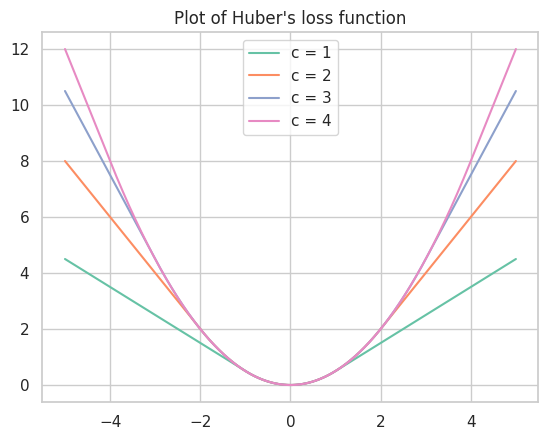

In [ ]:
def loss_function_huber(x, c):
  return ((x**2)/2)*(abs(x) <= c) + c*(abs(x) - c/2)*(abs(x) > c)

#Отрисовка графика
array_c = [1, 2, 3, 4]
array_x = np.linspace(-5, 5, 1000)

fig, ax = plt.subplots()
ax.set_title("Plot of Huber's loss function")
for c in array_c:
  ax.plot(array_x, loss_function_huber(array_x, c), label = f'c = {c}')
ax.legend()
plt.show()

В чём польза?

1.  C одной стороны, при нормировнных данных (расположенных в отрезке $[0, 1]$) мы выбором константы $c$ можем, так сказать, установить границу незначительной ошибки. Т.е. более подробнее: если $y_{\text{пред}} - y_{\text{ист}} \leq c,$ то ошибка будет считаться \textit{незначительной} (например, она на уровне ошибки изменениния прибора или т.п.) и будет давать меньший вклад к общую ошибку, т.к. $(y_{\text{пред}} - y_{\text{ист}}) \geq (y_{\text{пред}} - y_{\text{ист}})^{2},$ иначе ошибка уже \textit{существенная,} поэтому даёт больший вклад в общую ошибку.

2.  С другой стороны, при ненормированных данных выбором константы $c$ можно добиться, чтобы выбросы в данных меньше влияли на обучение модели. Т.е. более подробнее: если $y_{\text{пред}} - y_{\text{ист}} > c,$ то мы можем предположить, что это выброс, поэтому он будет давать меньший вклад к общую ошибку, т.к. $(y_{\text{пред}} - y_{\text{ист}}) \leq (y_{\text{пред}} - y_{\text{ист}})^{2},$ если выбрать $c \geq 1.$

Посчитаем производную $R(x):$
$$
R'(x) = x\,I\{|x|\leq c\} + c\,I\{x > c\} - c\,I\{x < -c\}
$$

Теперь посчитаем градиент $L(x),$ где
$$
L(\theta) = \sum_{i=1}^n R(Y_i - x_i^T \theta)
$$

$$
(\nabla L(θ))_{j} = -\sum_{i=1}^{n}x_{ij}[(Y_{i}-x_{i}^{T}θ)\,I\{|Y_{i}-x_{i}^{T}θ| \leq c\} + c\,I\{Y_{i}-x_{i}^{T}θ > c\} - c\,I\{Y_{i}-x_{i}^{T}θ < -c\}]
$$

Обозначим за $A(θ)$ вектор
$$
A_{i}(θ) = (Y_{i}-x_{i}^{T}θ)\,I\{|Y_{i}-x_{i}^{T}θ| \leq c\} + c\,I\{Y_{i}-x_{i}^{T}θ > c\} - c\,I\{Y_{i}-x_{i}^{T}θ < -c\}
$$

Тогда
$$
\nabla L(θ) = -X^{T}A(θ)
$$

В итоге формула градиентного спуска имеет вид
$$
θ_{t+1} = θ_{t} + η\,X^{T}A(θ) = θ_{t} + η\,\sum_{i=1}^{n}X_{i}A^{T}_{i}(\theta)
$$

А для стохастического градиентного спуска
$$
θ_{t+1} = θ_{t} + η\,\frac{n}{k}\,\sum_{j=1}^{k}X_{i_{j}}A^{T}_{i_{j}}(\theta)
$$

___
### Задача 3.

*Как говорилось на лекции, в стохастическом градиентном спуске (SGD) важно использовать несмещенные оценки градиента. Давайте посмотрим, как ведет себя SGD, если использовать смещенные оценки.*

Пусть случайная величина $X$ имеет нормальное распределение с параметрами $(a, \sigma^2)$, то есть:
$$
X \sim \mathcal{N}(a, \sigma^2)
$$
Рассмотрим следующую задачу оптимизации:
$$
f(X) = (\mathsf{E}X-1)^2 + (\mathsf{D}X - 1)^2 \longrightarrow \min_{a, \sigma^2}
$$
В данном случае правильный ответ мы можем легко найти непосредственно, однако в реальности возникают гораздо более сложные функции, и решить задачу напрямую руками не представляется возможным. Для решения таких задач применяются различные градиентные методы, такие как, например, стохастический градиентный спуск. Оказывается, что в нём критически важно использовать несмещенные оценки градиента.

*Замечание.* Если смещение заключается только в том, что математическое ожидание оценки отличается от вектора градиента домножением каждой компоненты на одну и ту же константу, то проблем нет &mdash; все равно мы используем шаг градиента.

В данной задаче вам предлагается на примере простой функции убедиться, насколько важным оказывается использовать несмещенные оценки в итерационных процедурах.

**Решение:**

Запишите оптимальные значения параметров $a$ и $\sigma^2$, а также шаг простого градиентного спуска (не стохастического) для минимизации определенной выше функции $f(X)$:

<br/><details>
<summary> ➡️ Кликни для показа подсказки </summary>
Просто вырази функцию $f$ через $a$ и $\sigma$ и запиши шаг градиентного спуска для этих параметров.
</details>

Запишим f(x) через значение параметров $a$ и $\sigma^{2}:$

$$
f(a, σ^{2}) = (a-1)^2 + (\sigma^{2} - 1)^{2}
$$

Оптимальные значение параметров: $a = 1$ и $\sigma^{2} = 1,$ т.к. понятно, что $f(a, \sigma^{2}) \geq 0,$ при этом $f(1, 1) = 0$.

Запишем шаг градиентного спуска
$$
\left\{\begin{array}{l}
  a_{t+1} = a_{t} - η\cdot2(a_{t}-1) \\
  \sigma^{2}_{t+1} = \sigma^{2}_{t} - η\cdot2(\sigma^{2}_{t}-1)
\end{array}\right.
$$

Реализуйте метод простого градиентного спуска для выше описанной задачи оптимизации. Для каждой итерации сохраните текущие значения среднего и дисперсии, постройте график зависимости значений $a$ и $\sigma^2$ от шага процедуры. Наблюдается ли сходимость к оптимальным параметрам?

<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1792122342.py:41: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_ylabel('$\sigma^{2}$')


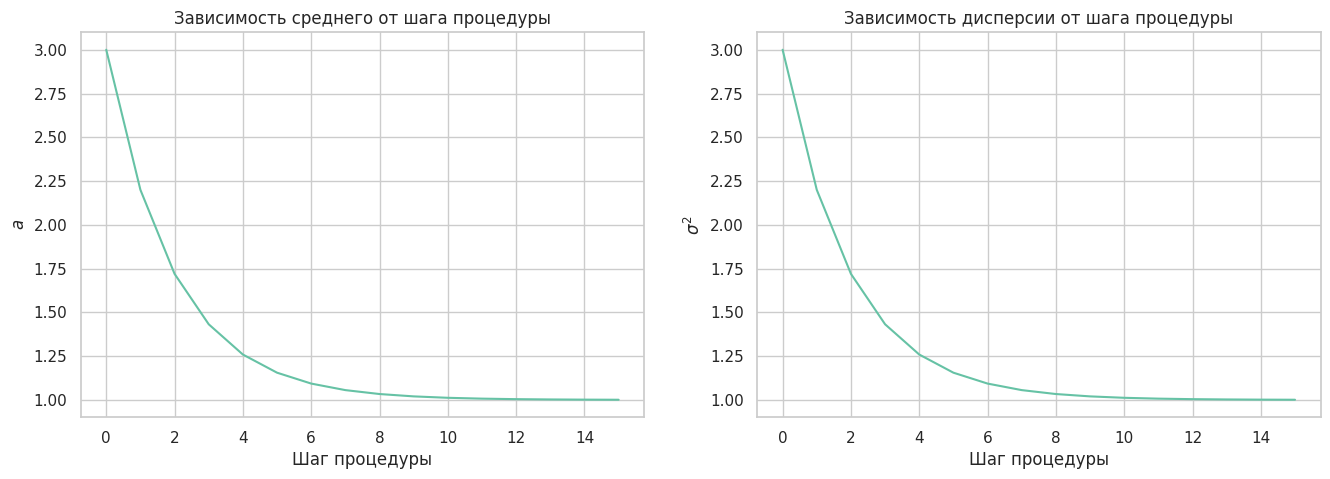

In [ ]:
a = 3
sigma2 = 3
eta = 1/5
tol=1e-6
tol_grad=1e-6

a_history = [a]
sigma2_history = [sigma2]

for _ in range(1000):
  grad_a = 2*(a-1)
  grad_sigma2 = 2*(sigma2-1)

  if grad_a**2 + grad_sigma2**2 < tol_grad:
    break

  a =  a - eta*grad_a
  sigma2 =  sigma2 - eta*grad_sigma2

  if (a - a_history[-1])**2 + (sigma2 - sigma2_history[-1])**2 < tol:
    a_history.append(a)
    sigma2_history.append(sigma2)
    break

  a_history.append(a)
  sigma2_history.append(sigma2)

size_history = len(a_history)
fig, axes = plt.subplots(1, 2, figsize = (size_history, 5))
ax1, ax2 = axes[0], axes[1]


ax1.plot(np.arange(size_history), np.array(sigma2_history))
ax1.set_title('Зависимость среднего от шага процедуры')
ax1.set_xlabel('Шаг процедуры')
ax1.set_ylabel('$a$')

ax2.plot(np.arange(size_history), np.array(a_history))
ax2.set_title('Зависимость дисперсии от шага процедуры')
ax2.set_xlabel('Шаг процедуры')
ax2.set_ylabel('$\sigma^{2}$')

plt.show()

Да, сходимость наблюдается.

Теперь предположим, что мы хотим оценить градиент стохастически. Например, давайте текущие значения среднего и дисперсии оценивать изученным ранее методом Монте-Карло. А именно, каждый раз мы будем генерировать выборку размера 5 из нормального распределения с текущими значениями параметров и далее по ней оценивать градиент.
Для оценки математического ожидания ипользуйте несмещенную оценку
$$\widehat{a} = \overline{X} := \frac{1}{n}\sum_{i=1}^n X_i,$$
а для дисперсии &mdash; смещенную
$$\widehat{\sigma}^2 = S^2 := \frac{1}{n}\sum_{i=1}^n \left(X_i - \overline{X}\right)^2.$$

Реализуйте описанный выше подход. Как и прежде, изобразите текущие значения параметров в зависимости от итерации. Сошлась ли такая процедура к оптимальным значениям?

<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2324496744.py:44: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_ylabel('$\sigma^{2}$')


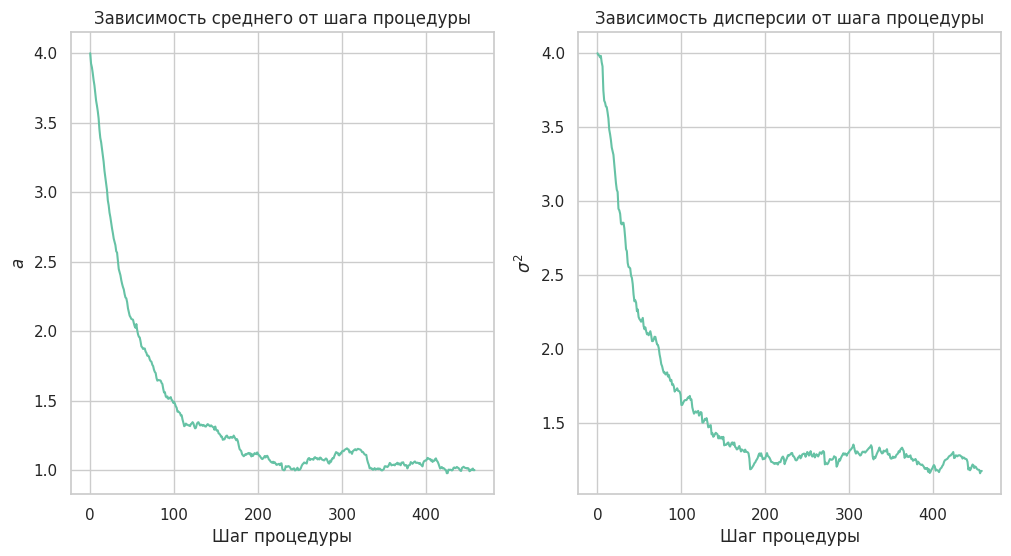

In [ ]:
a = 4
sigma2 = 4
eta = 1/100
tol=1e-6
tol_grad=1e-6

a_history = [a]
sigma2_history = [sigma2]

for _ in range(1000):
  x_samples = np.random.normal(loc = a, scale = np.sqrt(sigma2), size = (5, 1))

  hat_a = x_samples.mean()
  hat_sigma2 = ((x_samples - x_samples.mean())**2).mean()
  grad_a = 2*(hat_a-1)
  grad_sigma2 = 2*(hat_sigma2-1)

  if grad_a**2 + grad_sigma2**2 < tol_grad:
    break

  a =  a - eta*grad_a
  sigma2 =  sigma2 - eta*grad_sigma2

  if (a - a_history[-1])**2 + (sigma2 - sigma2_history[-1])**2 < tol:
    a_history.append(a)
    sigma2_history.append(sigma2)
    break

  a_history.append(a)
  sigma2_history.append(sigma2)

size_history = len(a_history)
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
ax1, ax2 = axes[0], axes[1]

ax1.plot(np.arange(size_history), np.array(a_history))
ax1.set_title('Зависимость среднего от шага процедуры')
ax1.set_xlabel('Шаг процедуры')
ax1.set_ylabel('$a$')

ax2.plot(np.arange(size_history), np.array(sigma2_history))
ax2.set_title('Зависимость дисперсии от шага процедуры')
ax2.set_xlabel('Шаг процедуры')
ax2.set_ylabel('$\sigma^{2}$')

plt.show()

Сходимость по $a$ видна, а по $\sigma^{2}$ нет.


Теперь изменим нашу процедуру, взяв несмещенную оценку для дисперсии
$$\widehat{\sigma}^2 = S^2_{u} := \frac{1}{n-1}\sum_{i=1}^n \left(X_i - \overline{X}\right)^2.$$

Обратите внимание на параметр `ddof` в функции `np.var`.

Поменялся ли результат?

<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3309088641.py:44: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_ylabel('$\sigma^{2}$')


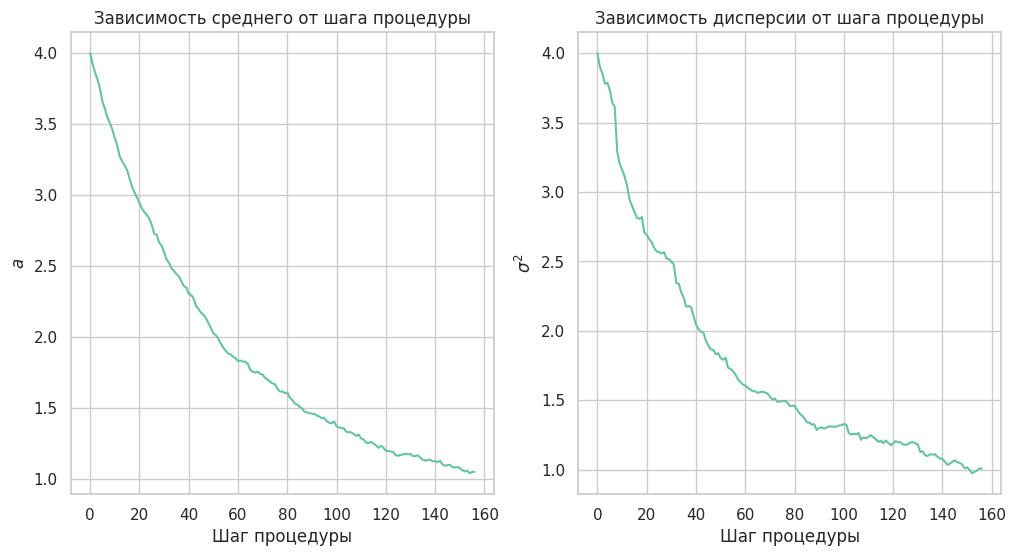

In [ ]:
a = 4
sigma2 = 4
eta = 1/100
tol=1e-6
tol_grad=1e-6

a_history = [a]
sigma2_history = [sigma2]

for _ in range(1000):
  x_samples = np.random.normal(loc = a, scale = np.sqrt(sigma2), size = (5, 1))

  hat_a = x_samples.mean()
  hat_sigma2 = (1/4)*np.sum((x_samples - x_samples.mean())**2)
  grad_a = 2*(hat_a-1)
  grad_sigma2 = 2*(hat_sigma2-1)

  if grad_a**2 + grad_sigma2**2 < tol_grad:
    break

  a =  a - eta*grad_a
  sigma2 =  sigma2 - eta*grad_sigma2

  if (a - a_history[-1])**2 + (sigma2 - sigma2_history[-1])**2 < tol:
    a_history.append(a)
    sigma2_history.append(sigma2)
    break

  a_history.append(a)
  sigma2_history.append(sigma2)

size_history = len(a_history)
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
ax1, ax2 = axes[0], axes[1]

ax1.plot(np.arange(size_history), np.array(a_history))
ax1.set_title('Зависимость среднего от шага процедуры')
ax1.set_xlabel('Шаг процедуры')
ax1.set_ylabel('$a$')

ax2.plot(np.arange(size_history), np.array(sigma2_history))
ax2.set_title('Зависимость дисперсии от шага процедуры')
ax2.set_xlabel('Шаг процедуры')
ax2.set_ylabel('$\sigma^{2}$')

plt.show()

Видна сходимость по обоим параметрам.

**Вывод:** При использовании стохастического градиентного спуска критически необходимо использовать несмещенные оценки.

---
### Задача 4.

*Наконец, рассмотрим, как можно использовать стохастические градиентные методы при оптимизации сложных функций.*

Некоторая ML-модель имеет один параметр $\theta$, который обучается посредством *минимизации* функции
$$\mathcal{L}(\theta) = \mathsf{E} \exp\left(-\frac{\xi^2\sqrt{\eta}}{1+\theta^2}\right),$$
где $\xi$ имеет стандартное нормальное распределение, а $\eta$ &mdash; пуассоновское распределение с параметром 5 и не зависит от $\eta$.


Оптимизируйте эту функцию, используя стохастический градиентный спуск.


<br/><details>
<summary> ➡️ Кликни для показа подсказки </summary>
Дифференцирование и мат. ожидание можно менять местами. Далее, обрати внимание на метод Монте-Карло с лекции, с его помощью можно оценить мат. ожидание.
</details>

Посчитаем производную данной функции
$$
\mathcal{L}(\theta) = \mathsf{E} \exp\left(-\frac{\xi^2\sqrt{\eta}}{1+\theta^2}\right)
$$

$$
\mathcal{L}'(\theta) = \mathsf{E} \exp\left(-\frac{\xi^2\sqrt{\eta}}{1+\theta^2}\right)\frac{\theta\,\xi^2\sqrt{\eta}}{(1+\theta^2)^{2}}
$$

Для оценки градиента возьмем выборки случайных величин и используем оценку
$$\overline{X} := \frac{1}{n}\sum_{i=1}^n X_i$$

Оптимальное значение параметра: 0.00


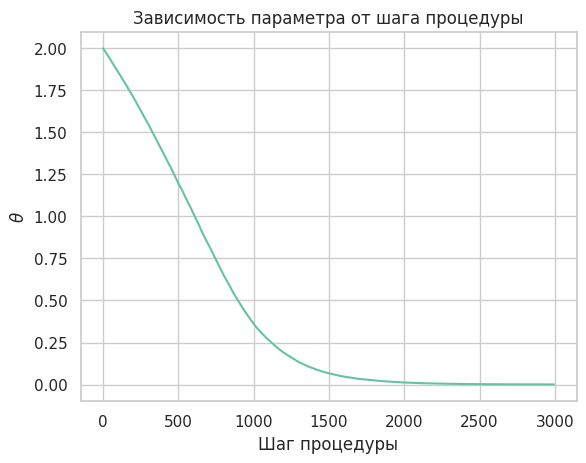

In [ ]:
theta = 2
eta = 1/100
tol=1e-6
tol_grad=1e-6

theta_history = [theta]

for _ in range(10000):
  xi_samples = np.random.normal(loc = 0, scale = 1, size = (15, 1))
  eta_samples = np.random.poisson(lam = 5, size = (15, 1))

  grad_theta = (np.exp(-((xi_samples**2)*(np.sqrt(eta_samples)))/(1+theta**2))*((2*(xi_samples**2)*(np.sqrt(eta_samples))*theta)/((1+theta**2)**2))).mean()

  if abs(grad_theta) < tol_grad:
    break

  theta = theta - eta*grad_theta

  if abs(theta - theta_history[-1]) < tol:
    theta_history.append(theta)
    break

  theta_history.append(theta)


fig, ax = plt.subplots()
ax.plot(np.arange(len(theta_history)), np.array(theta_history))
ax.set_title('Зависимость параметра от шага процедуры')
ax.set_xlabel('Шаг процедуры')
ax.set_ylabel(r'$\theta$')

print(f'Оптимальное значение параметра: {theta:.2f}')

plt.show()

---
### Задача 5.

*Устали писать формулы? Самое время что-то закодить! Давайте закодим то, что вывели во 2-й задаче.*

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс в различных пайплайнах библиотеки `sklearn`.

**1.** Реализуйте класс. **При реализации класса запрещено пользоваться ИИ-инструментами.**

In [ ]:
# При реализации класса запрещено пользоваться ИИ-инструментами.

from sklearn.base import BaseEstimator

class HuberRegression(BaseEstimator):
    """Класс, реализующий линейную регрессию с функцией потерь Хьюбера."""

    def __init__(self, c: float = 1.0, fit_intercept: bool = True, max_iter: int = 1000) -> None:
        """Инициализирует модель.

        Параметры: c (float): Константа из функции потерь Хьюбера.
        fit_intercept (bool): Добавлять ли константный признак. max_iter
        (int): Максимальное число итераций оптимизации.
        """
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter

    def fit(self, X: np.ndarray, y: np.ndarray) -> "HuberRegression":
        """Обучает модель.

        Параметры:
        X (np.ndarray): Матрица признаков.
        y (np.ndarray): Вектор целевой переменной.

        Возвращает:
        HuberRegression: Обученная модель.
        """
        if X.shape[0] != y.shape[0]:
            raise ValueError("Количество строк в X и y должно совпадать")

        if self.fit_intercept:
          data = np.hstack([X, np.array([1]*X.shape[0]).reshape(-1, 1)])
        else:
          data = X.copy()

        theta = np.array([3]*data.shape[1]).reshape(-1, 1)
        eta = 1/100
        tol=1e-6
        tol_grad=1e-6

        for _ in range(self.max_iter):
          A = (y - data @ theta)*(np.abs(y - data @ theta) <= self.c) + (np.array([self.c]*data.shape[0]))*(y - data @ theta > self.c) + (np.array([-self.c]*data.shape[0]))*(y - data @ theta < -self.c)
          grad = -(data.T @ A)
          grad_norm = np.linalg.norm(grad)

          if grad_norm < tol_grad:
            break

          theta_new = theta - eta * grad

          if np.linalg.norm(theta_new - theta) < tol:
            theta = theta_new
            break

          theta = theta_new


        self.coef_ = theta  # Коэффициенты модели
        self.intercept_ = data[-1] if self.fit_intercept else 0 # Свободный коэффициент
        self.n_iter_ = _ + 1  # Число итераций

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Делает предсказание на новых данных.

        Параметры: X (np.ndarray): Матрица признаков.

        Возвращает: np.ndarray: Вектор предсказанных значений.
        """
        if self.fit_intercept:
          data = np.hstack([X, np.array([1]*X.shape[0]).reshape(-1, 1)])
        else:
          data = X.copy()

        if data.shape[1] != self.coef_.shape[0]:
            raise ValueError(f"Число признаков в X {X_copy.shape[1]} и {self.coef_.shape[0]} не соответствует числу коэффициентов модели")

        pred = (data @ self.coef_).flatten()

        return pred

**2.** Загрузите данные из файлов <a href="https://thetahat.ru/files/ad/main/3/train.csv"><code>train.csv</code></a>, <a href="https://thetahat.ru/files/ad/main/3/test.csv"><code>test.csv</code></a>. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [ ]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
train_data

,feature_1,feature_2,feature_3,target
0,2.320800,-1.098571,0.117091,162.910894
1,0.625119,-0.782367,-0.813596,21.113006
2,-0.807648,-0.185054,-1.446535,-36.128990
3,-0.291837,-1.616474,-0.761492,-56.474495
4,0.938747,0.087531,0.607112,189.589573
...,...,...,...,...
330,-3.265200,-3.672560,-2.657417,708.438847
331,-3.853111,-3.152533,-3.493896,744.066873
332,-2.852711,-3.301565,-3.636479,707.650768
333,-3.060254,-2.831997,-3.012904,720.185363


Посмотрите на зависимость целевой переменной от каждого признака.

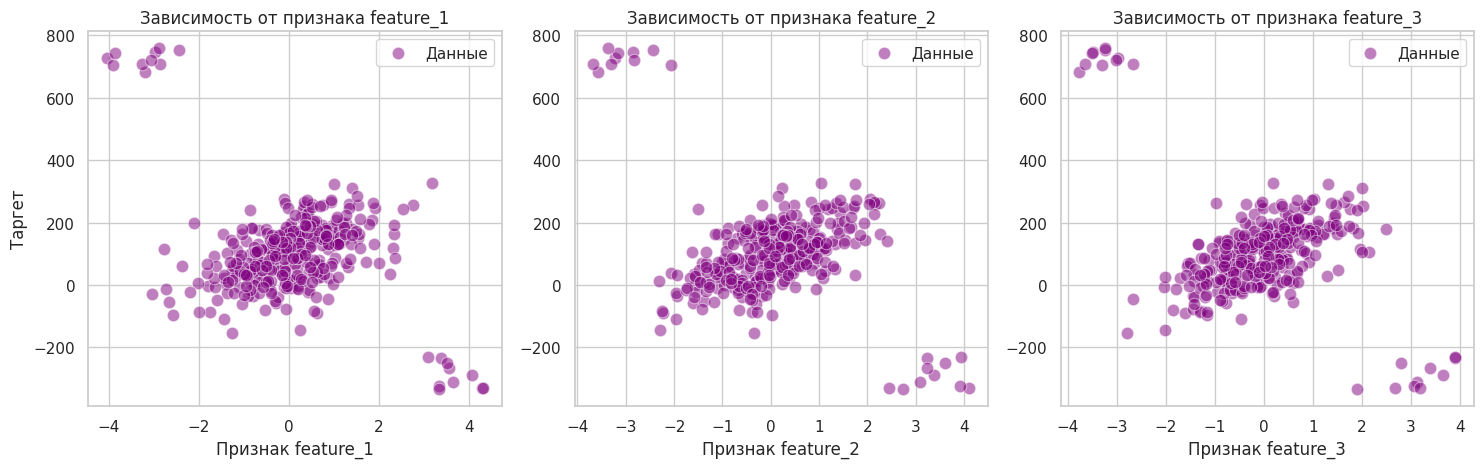

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(3*5, 5))
axes = axes.flatten()

for i, ftr in enumerate(["feature_1", "feature_2", "feature_3"]):
    ax = axes[i]
    sns.scatterplot(
        x=train_data[ftr].to_numpy().reshape(-1), y=train_data["target"].to_numpy().reshape(-1), label="Данные", ax = ax, alpha=0.5, s=80, color="purple" )
    ax.set_title(f"Зависимость от признака {ftr}")
    ax.set_xlabel(f"Признак {ftr}")
    ax.set_ylabel("Таргет" if i == 0 else "")

fig_reat.suptitle("Зависимость целевой переменной от признаков", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show();

Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать?

Они есть и их приличное количество. Они могут влиять на обучение модели, т.к. они могут давать большую ошибку, модель начнет минимизировать ошибку на выбросах, а не на реальных данных.

**3.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

In [ ]:
linreg_model = LinearRegression()

linreg_model.fit(train_data.drop(["target"], axis = 1), train_data["target"])

prediction = linreg_model.predict(test_data.drop(["target"], axis = 1))

mse_test = mean_squared_error(test_data["target"], prediction)

print(f"Test MSE: {mse_test:.2f}")

Test MSE: 17025.81


Что можно сказать о качестве нашей модели?

Качетво модели низкое из большого влияния выбросов на неё.

**4.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE.

In [ ]:
huber_model = HuberRegression()

huber_model.fit(train_data.drop(["target"], axis = 1).to_numpy(), train_data["target"].to_numpy())

prediction = huber_model.predict(test_data.drop(["target"], axis = 1).to_numpy())

mse_test = mean_squared_error(test_data["target"].to_numpy(), prediction)

print(f"Test MSE: {mse_test:.2f}")

ValueError: Found input variables with inconsistent numbers of samples: [135, 45225]

Что изменилось?

...

**5.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака.

In [ ]:
...

Что можно заметить на этих графиках?

...

**Вывод:**

...

---
© 2025 команда <a href="https://thetahat.ru/">ThetaHat</a> для курса ML-1 ШАД